# DATASET TO START WITH:

We can’t use SIPaKMeD & Herlev datasets as they do not follow the Bethesda classification.

-> use MENDELEY liquid-based smear test image dataset downloadable from https://data.mendeley.com/datasets/zddtpgzv63/2

-> use Cervix93 downloadable from https://github.com/parham-ap/cytology_dataset/tree/master/dataset 

# Ideas For Additional Features To Create From Cytology Images

- histogram of greyscale image - would need to be normalized somehow?
- edge detection (thresholds would need to be applied on normalized image or defined individually per image?)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import json
import pprint

In [ ]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [ ]:
# example from Cervix93

img9 = cv.imread('/content/fov009.png')
img9_bw = cv.imread('/content/fov009.png', 0)

In [ ]:
img9[:,:,0] == img9[:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
img9[:,:,1] == img9[:,:,2]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
img9[:,:,1].shape

(960, 1280)

In [ ]:
print(img9.shape)
print(img9_bw.shape)

(960, 1280, 3)
(960, 1280)


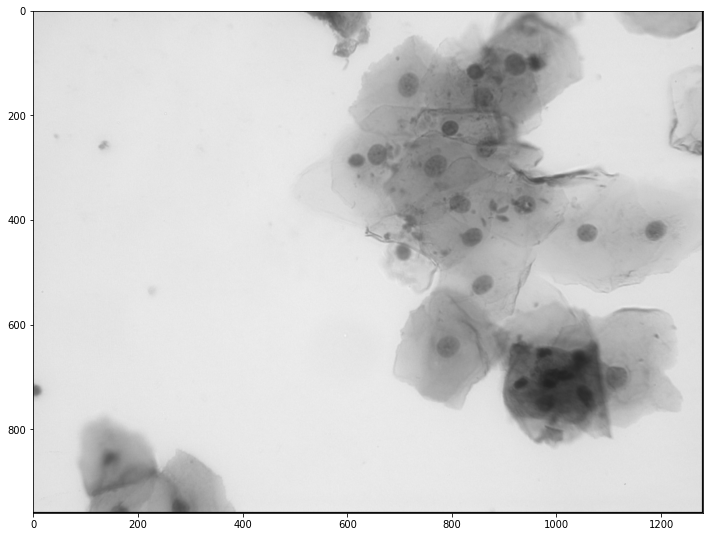

In [ ]:
display(img9)

In [ ]:
# healthy example from SIPaKMeD

#img7 = cv.imread('007.bmp')
#img15 = cv.imread('015.bmp')

In [ ]:
# metaplastic example

img73 = cv.imread('073.bmp')

In [ ]:
img7.shape

(1536, 2048, 3)

In [ ]:
img7_bw = cv.imread('007.bmp',0)

In [ ]:
img73_bw = cv.imread('073.bmp',0)

In [ ]:
img7_bw.shape

(1536, 2048)

In [ ]:
type(img7)

numpy.ndarray

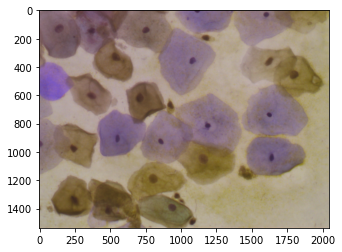

In [ ]:
plt.imshow(img7)

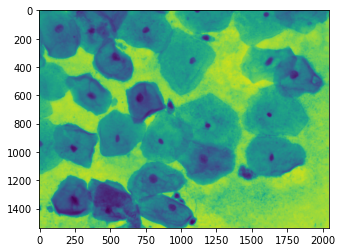

In [ ]:
plt.imshow(img7_bw)

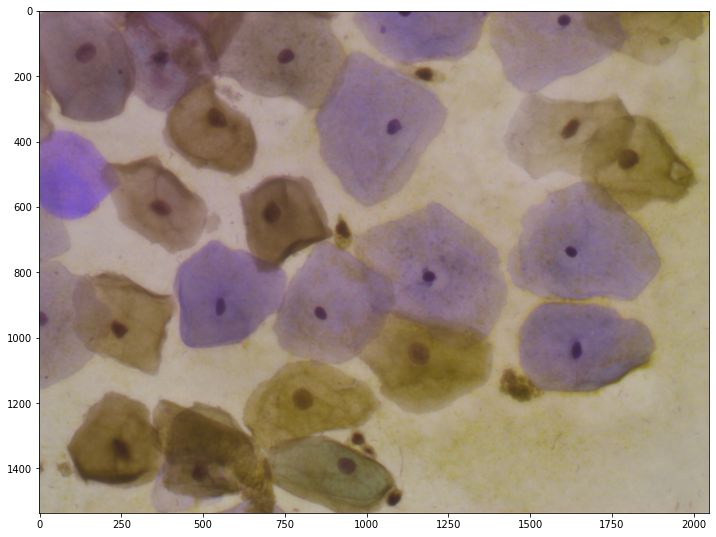

In [ ]:
display(img7)

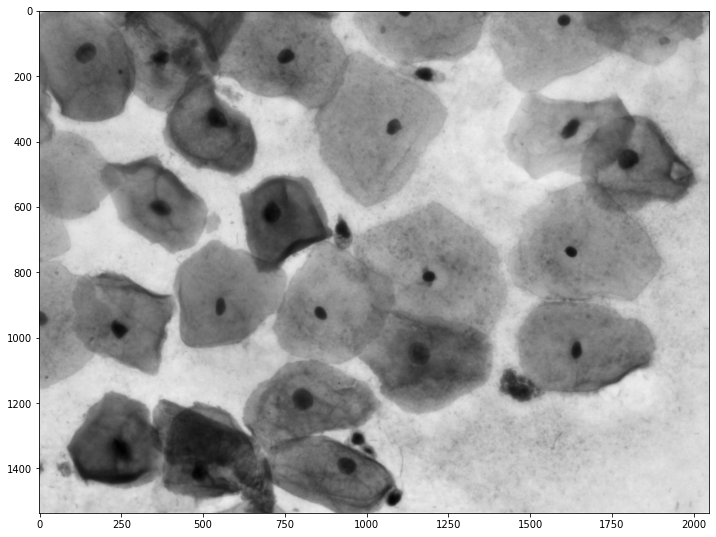

In [ ]:
display(img7_bw)

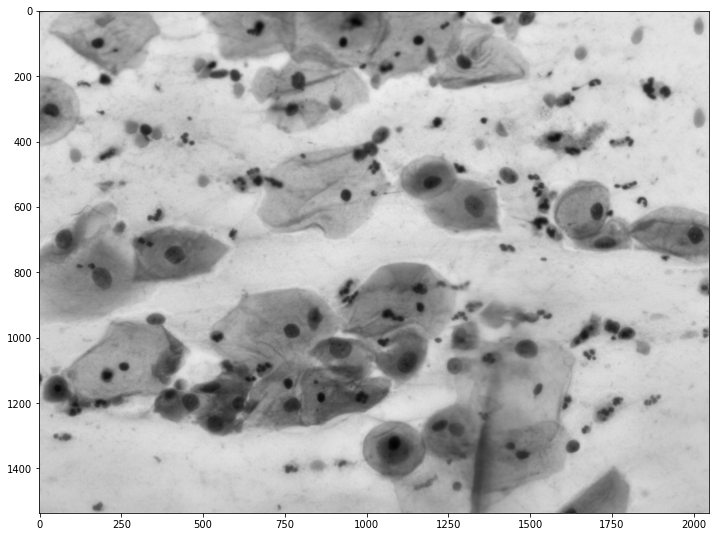

In [ ]:
display(img73_bw)

# HISTOGRAM Using OpenCV 

Text(0.5, 1.0, 'histogram for img')

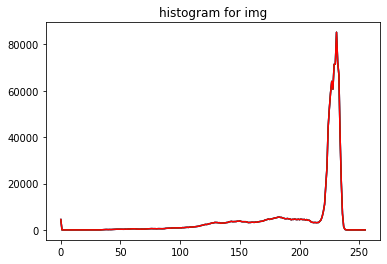

In [ ]:
# histogram for all 3 color channels

color = ('b', 'g', 'r')

for i, col in enumerate(color):
  histr = cv.calcHist([img9], [i], None, [256], [0,256])
  plt.plot(histr,color=col)
  #plt.xlim([0,100])
plt.title('histogram for img')

In [ ]:
img = img7

In [ ]:
hist_values0 = cv.calcHist([img], channels = [0], mask=None, histSize=[256], ranges=[0,256])
hist_values1 = cv.calcHist([img], channels = [1], mask=None, histSize=[256], ranges=[0,256])
hist_values2 = cv.calcHist([img], channels = [2], mask=None, histSize=[256], ranges=[0,256])

In [ ]:
hist_values0.shape

(256, 1)

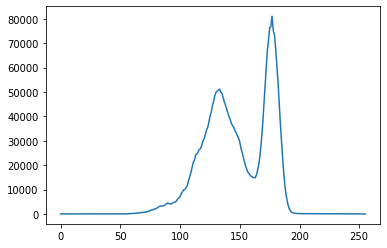

In [ ]:
# histogram for only the blue channel

plt.plot(hist_values0)

Text(0.5, 1.0, 'histogram for img')

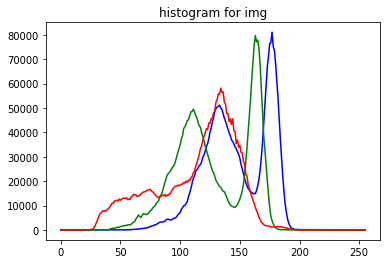

In [ ]:
# histogram for all 3 color channels

color = ('b', 'g', 'r')

for i, col in enumerate(color):
  histr = cv.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr,color=col)
  #plt.xlim([0,100])
plt.title('histogram for img')

In [ ]:
img7_bw.shape

(1536, 2048)

In [ ]:
hist_values_bw_1 = cv.calcHist([img7_bw], channels = [0], mask=None, histSize=[256], ranges=[0,256])

In [ ]:
hist_values_bw_6 = cv.calcHist([img73_bw], channels = [0], mask=None, histSize=[256], ranges=[0,256])

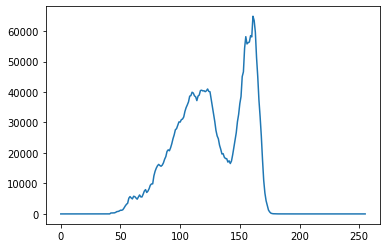

In [ ]:
# histogram for the greyscale version of the image

plt.plot(hist_values_bw_1)

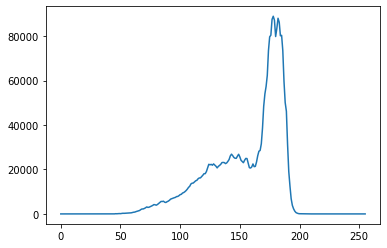

In [ ]:
plt.plot(hist_values_bw_6)

(50.0, 180.0)

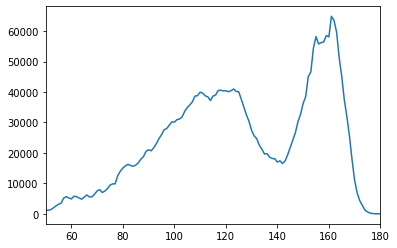

In [ ]:
plt.plot(hist_values_bw)
plt.xlim([50,180])

In [ ]:
edges = cv.Canny(image=img7_bw, threshold1=10, threshold2=60)

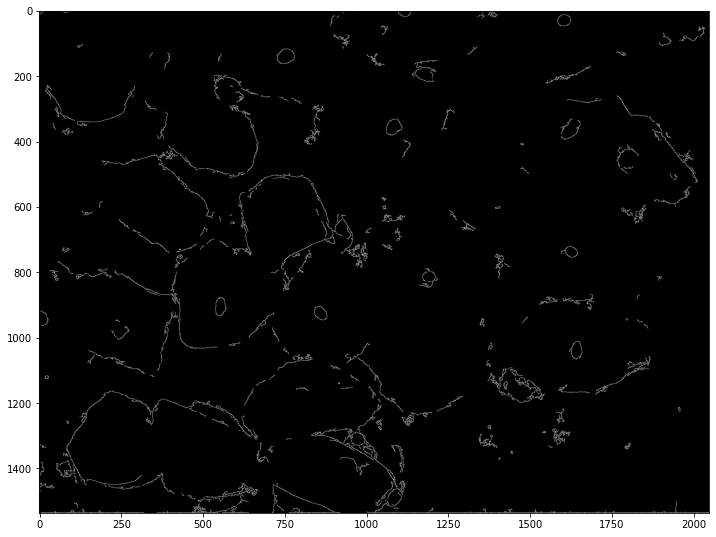

In [ ]:
display(edges)

In [ ]:
edges_6 = cv.Canny(image=img73_bw, threshold1=10, threshold2=60)

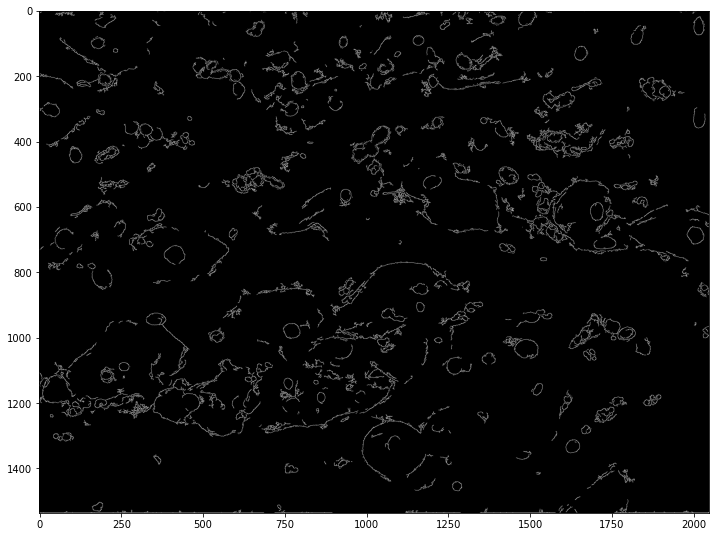

In [ ]:
display(edges_6)

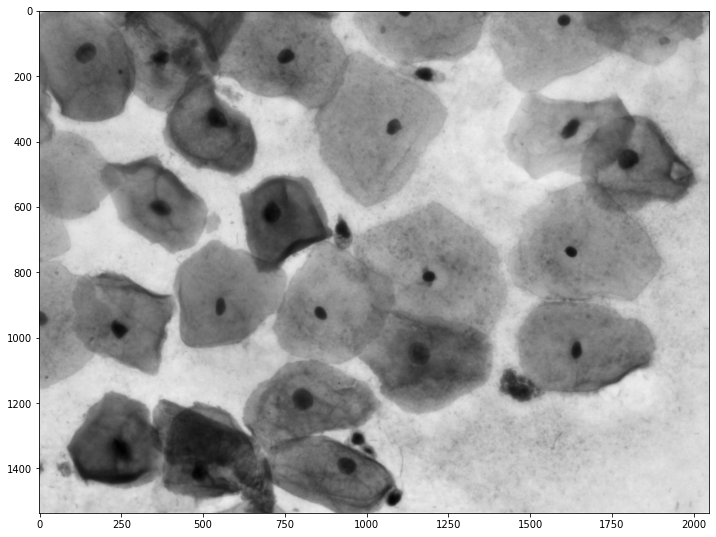

In [ ]:
# upper peak = nuclei
# lower peak = cell bodies
# -> possible to detect the 2 separately?

display(img7_bw)

# CellPose Library suggested by Kayla

https://cellpose.readthedocs.io/en/latest/outputs.html 

In [ ]:
pip install cellpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 169 kB 5.1 MB/s 
     |████████████████████████████████| 31.0 MB 1.6 MB/s 
     |████████████████████████████████| 4.2 MB 35.4 MB/s 


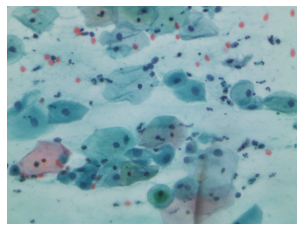

In [ ]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

'''
# I will download images from website
urls = ['http://www.cellpose.org/static/images/img02.png',
        'http://www.cellpose.org/static/images/img03.png',
        'http://www.cellpose.org/static/images/img05.png']
files = []
for url in urls:
    parts = urlparse(url)
    filename = os.path.basename(parts.path)
    if not os.path.exists(filename):
        sys.stderr.write('Downloading: "{}" to {}\n'.format(url, filename))
        utils.download_url_to_file(url, filename)
    files.append(filename)
'''

# REPLACE FILES WITH YOUR IMAGE PATHS
# files = ['img0.tif', 'img1.tif']
files = ['007.bmp', '073.bmp']

# view 1 image
img = io.imread(files[-1])
#plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in for filename in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
for chan, filename in zip(channels, files):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # save results as png
    io.save_to_png(img, masks, flows, filename)

100%|██████████| 25.3M/25.3M [00:00<00:00, 44.8MB/s]
100%|██████████| 5.23k/5.23k [00:00<00:00, 8.27MB/s]


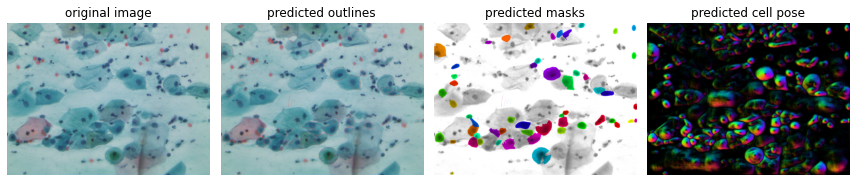

In [ ]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from cellpose import plot, utils
dat = np.load('_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'],
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

# CODE BELOW = from previous projects, not ran on CervAI data

# chpt 45 - Edge Detection

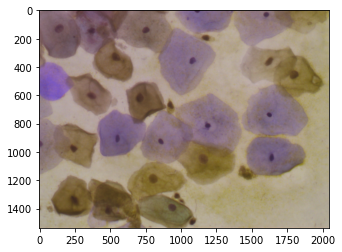

In [ ]:
plt.imshow(img7)

In [ ]:
edges = cv.Canny(image=img7_bw, threshold1=100, threshold2=200)

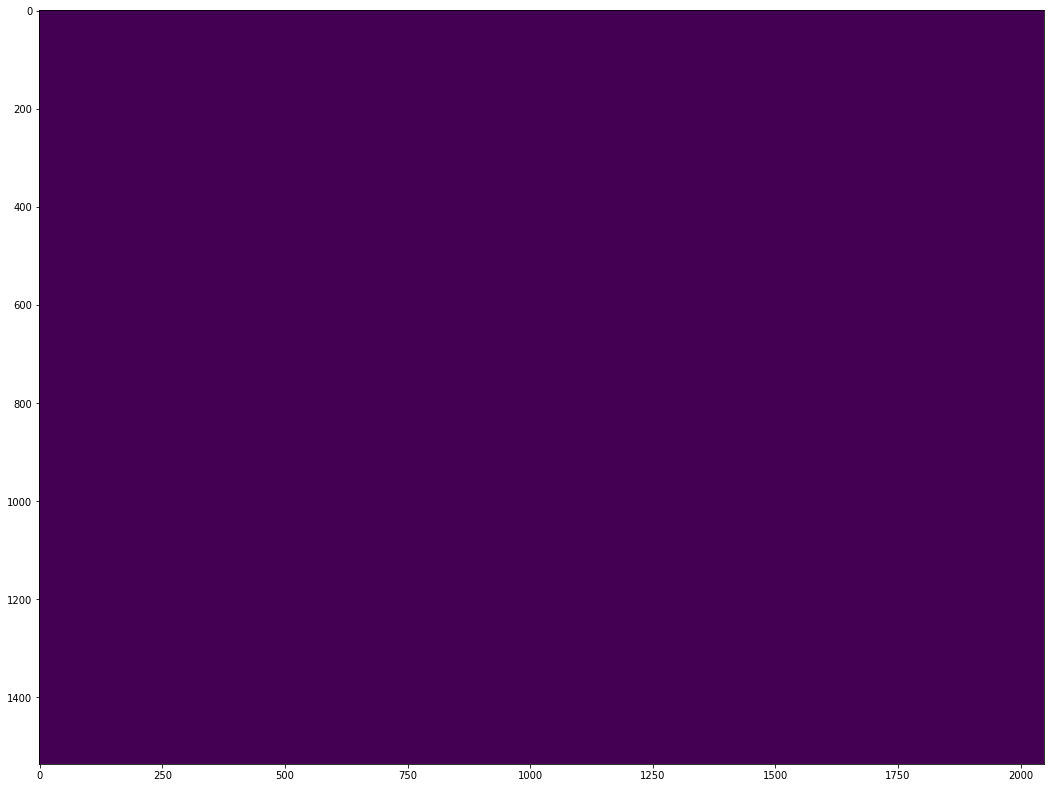

In [ ]:
plt.figure(figsize = (18, 18))
plt.imshow(edges)

In [ ]:
edges = cv.Canny(image=img7_bw, threshold1=100, threshold2=200)

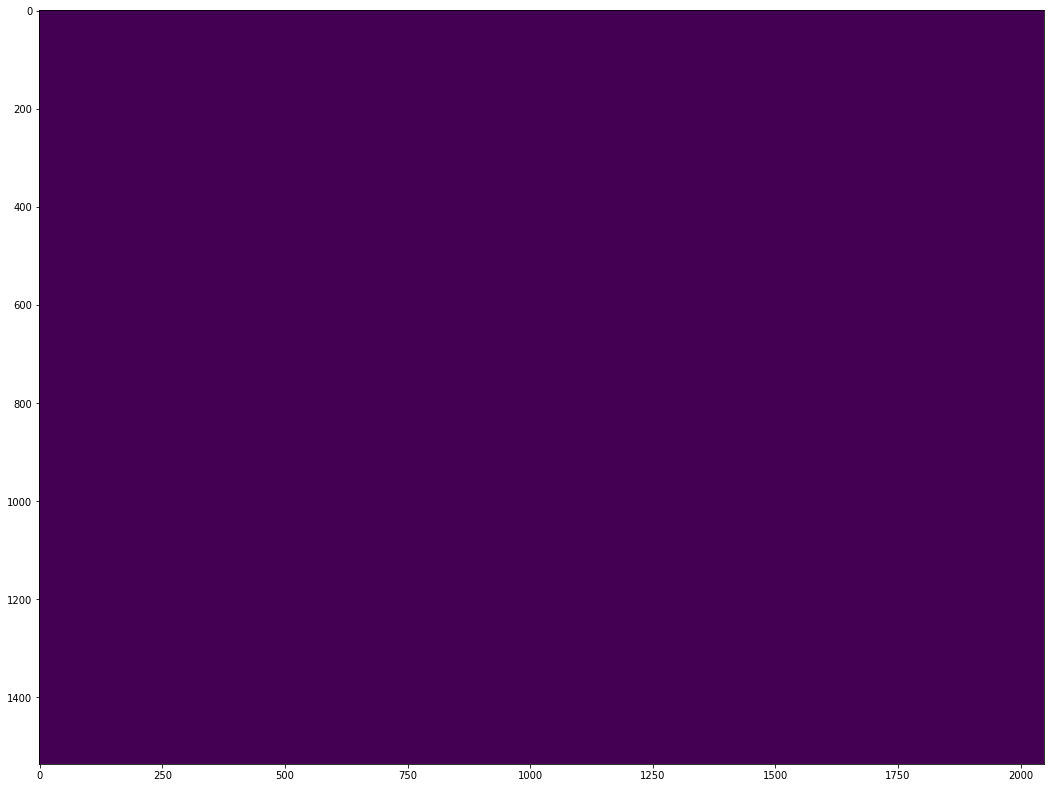

In [ ]:
plt.figure(figsize = (18, 18))
plt.imshow(edges)

In [ ]:
# blur image to get rid of details/noise
blurred_img3 = cv.blur(img3, ksize=(5,5))

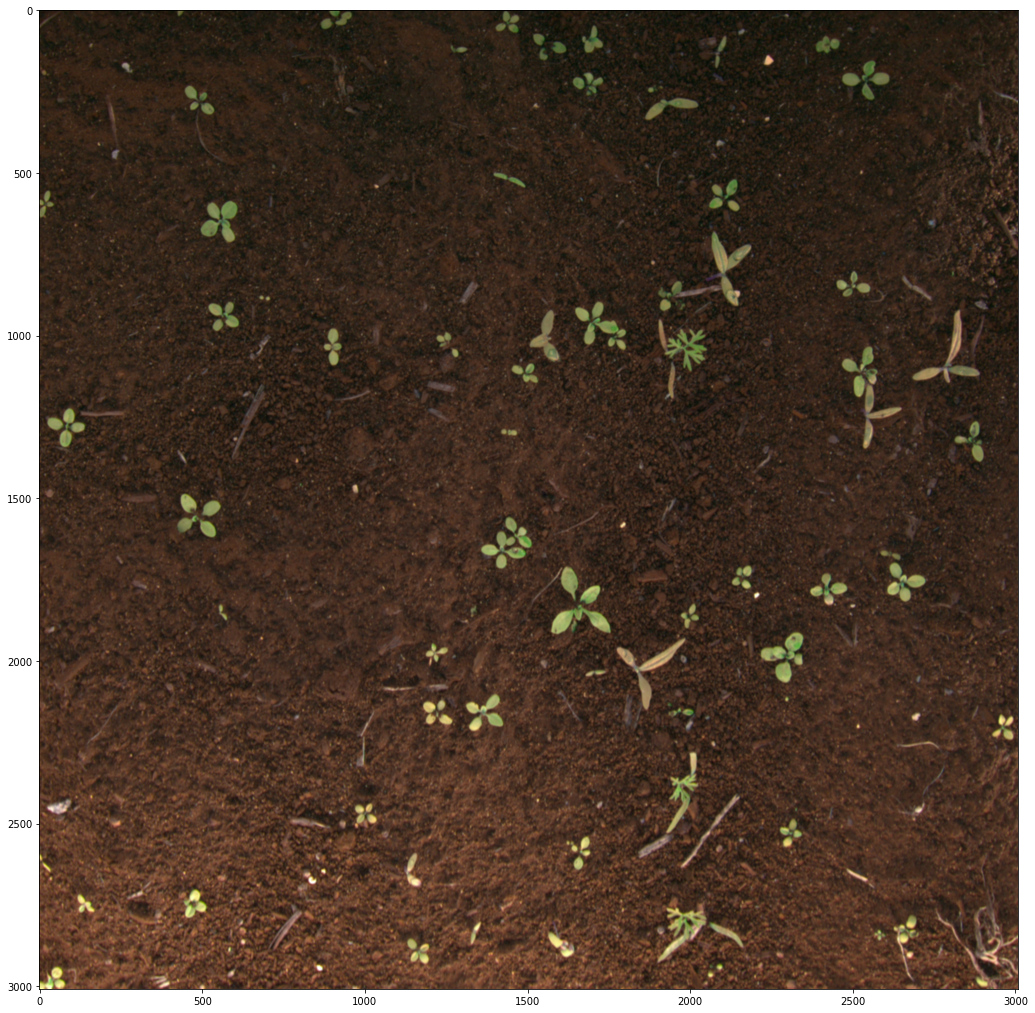

In [ ]:
plt.figure(figsize = (18, 18))
plt.imshow(blurred_img3)

In [ ]:
blurred_img2.shape

(3008, 3008, 3)

In [ ]:
hist_values0 = cv.calcHist([blurred_img2], channels = [0], mask=None, histSize=[256], ranges=[0,256])
hist_values1 = cv.calcHist([blurred_img2], channels = [1], mask=None, histSize=[256], ranges=[0,256])
hist_values2 = cv.calcHist([blurred_img2], channels = [2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5, 1.0, 'histogram for img')

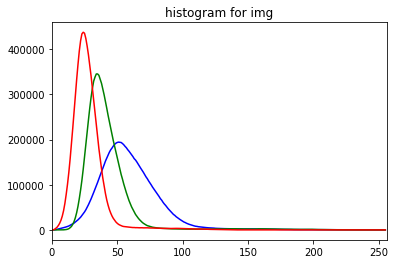

In [ ]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):
  histr = cv.calcHist([blurred_img2], [i], None, [256], [0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,256])
plt.title('histogram for img')

In [ ]:
# need to convert to BW before possible !?!

contours, hierarchy = cv.findContours(img7_bw,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)

In [ ]:
external_contours = np.zeros(img_greens.shape)

NameError: ignored

In [ ]:
external_contours.shape

(3008, 3008)

In [ ]:
for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
    cv.drawContours(external_contours, contours, i, 255, -1)

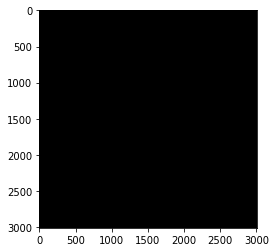

In [ ]:
plt.imshow(external_contours, cmap='gray')

In [ ]:
external_contours.min()

255.0

In [ ]:
# 1. apply median blur
# 2. convert to grayscale
# 3. binary threshold
# 4. find contours

In [ ]:
# blurring radius will affect measured nucleus size !!

bw_blur = cv.medianBlur(img7_bw, 3)

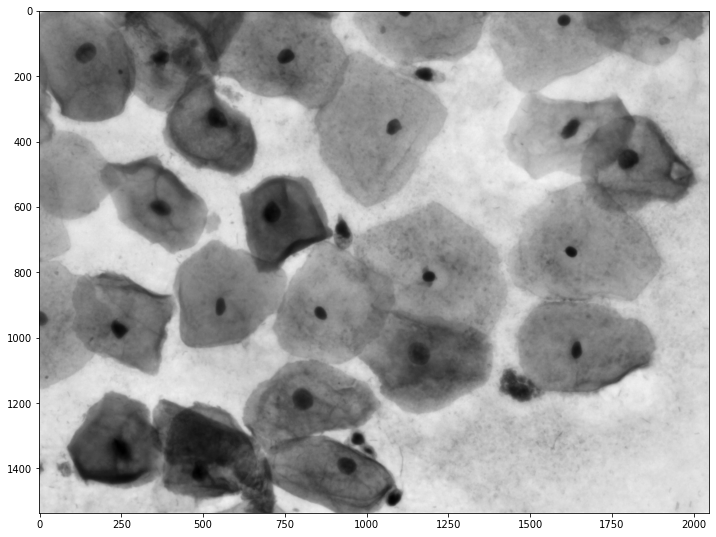

In [ ]:
display(bw_blur)

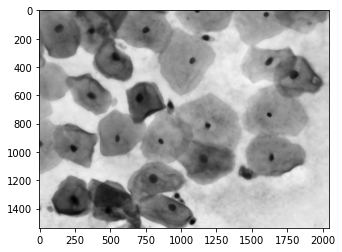

In [ ]:
plt.imshow(bw_blur, cmap='gray')

In [ ]:
bw_blur.shape

(1536, 2048)

In [ ]:
blurred_img2_grayscale = cv.cvtColor(blurred_img2, cv.COLOR_BGR2GRAY)

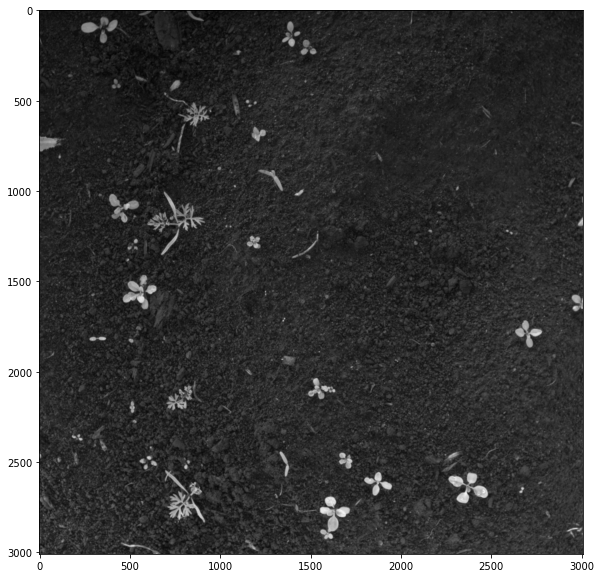

In [ ]:
display(blurred_img2_grayscale)

In [ ]:
blurred_img2_grayscale.shape

(3008, 3008)

In [ ]:
hist_values = cv.calcHist([bw_blur], channels = [0], mask=None, histSize=[256], ranges=[0,256])

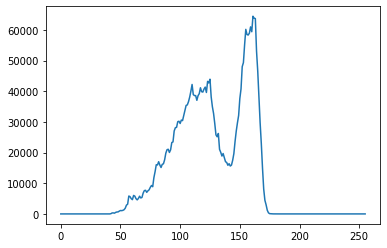

In [ ]:
plt.plot(hist_values)

In [ ]:
# separate into foreground and background:

ret, sep_thresh = cv.threshold(bw_blur,110,111,cv.THRESH_BINARY_INV)

In [ ]:
# crop: 350-1600x, 950-1750 y
display(sep_thresh)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

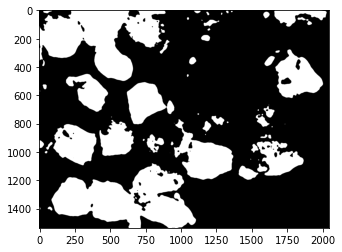

In [ ]:
plt.imshow(sep_thresh, cmap='gray')

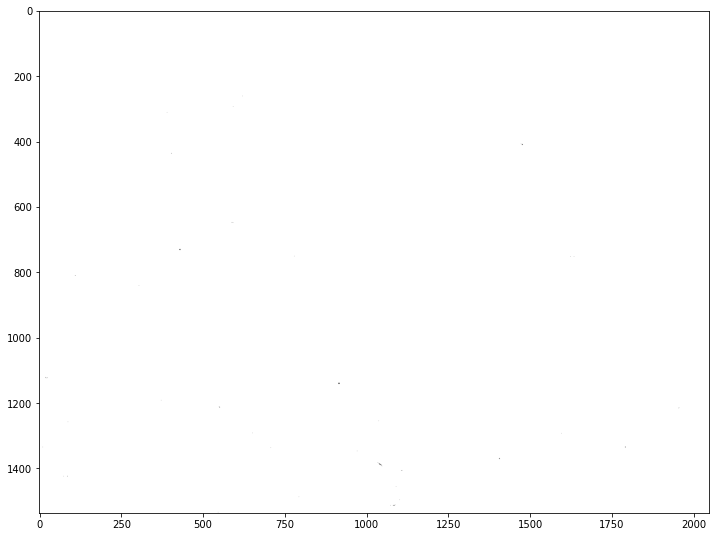

In [ ]:
adaptive_thresh_img = cv.adaptiveThreshold(bw_blur,20,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,7)
display(adaptive_thresh_img)

## Generate skeleton from image


In [ ]:
! pip3 install plantcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 286 kB 2.7 MB/s 
     |████████████████████████████████| 41 kB 700 kB/s 
     |████████████████████████████████| 837 kB 37.7 MB/s 
     |████████████████████████████████| 1.1 MB 21.1 MB/s 
     |████████████████████████████████| 141 kB 19.5 MB/s 
     |████████████████████████████████| 596 kB 50.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3


In [ ]:
from plantcv import plantcv as pcv

In [ ]:
a = pcv.rgb2gray_lab(rgb_img=img7_bw, channel='a')
img_binary = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, object_type='dark')
if len(np.unique(img_binary)) == 2:
  plantCvOutput_LM = pcv.fill(bin_img=img_binary, size=10)
Image.fromarray(plantCvOutput_LM)

error: ignored

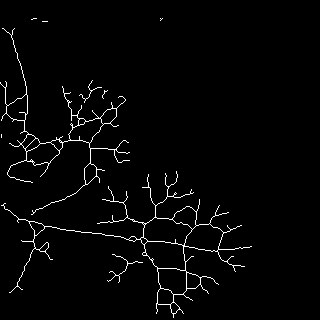

In [ ]:
skeleton = pcv.morphology.skeletonize(mask=plantCvOutput_LM)
Image.fromarray(skeleton)

# tutorial57_Cell Nuclei analysis using watershed.py

In [ ]:
# copied from https://github.com/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial57_Cell%20Nuclei%20analysis%20using%20watershed.py

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img = cv.imread('007.bmp')
#img = cv2.imread("images/Osteosarcoma_01.tif")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

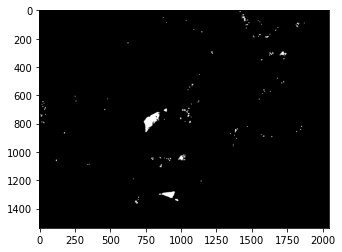

In [ ]:
# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
plt.imshow(opening, cmap='gray') #This is our image to be segmented further using watershed

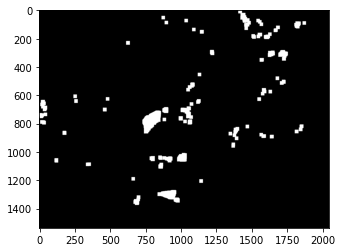

In [ ]:
#Check the total regions found before and after applying this. 

#STEP 1: Sude background 
#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that erode a few times. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us. 
sure_bg = cv2.dilate(opening,kernel,iterations=10)
plt.imshow(sure_bg, cmap='gray') #Dark region is our sure background

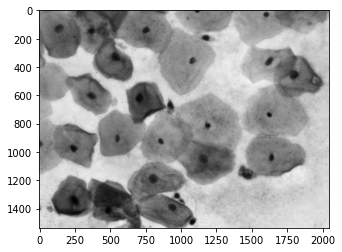

In [ ]:
plt.imshow(bw_blur, cmap='gray')

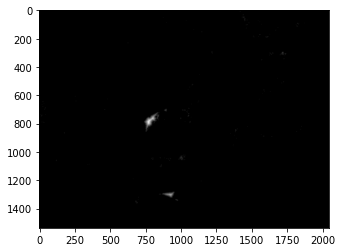

In [ ]:
# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform, cmap='gray') #Dist transformed img. 

28.559694


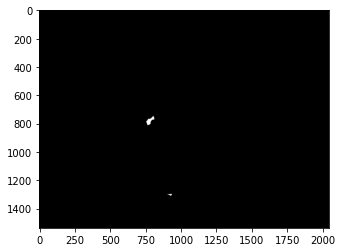

In [ ]:
#Let us threshold the dist transform by starting at 1/2 its max value.
print(dist_transform.max()) #gives about 21.9
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

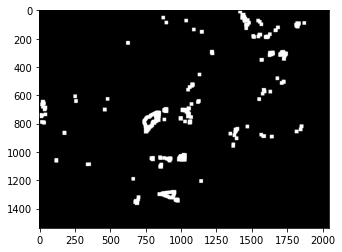

In [ ]:
#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)  #Convert to uint8 from float
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray')

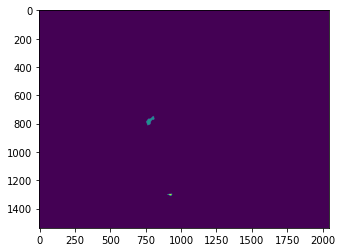

In [ ]:
#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
#Connected components labeling scans an image and groups its pixels into components 
#based on pixel connectivity, i.e. all pixels in a connected component share 
#similar pixel intensity values and are in some way connected with each other. 
#Once all groups have been determined, each pixel is labeled with a graylevel 
# or a color (color labeling) according to the component it was assigned to.
ret3, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers)

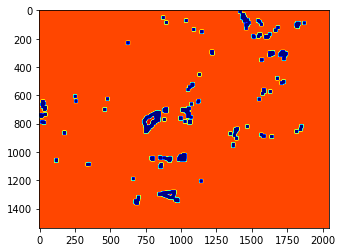

In [ ]:
#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

In [ ]:
#Now we are ready for watershed filling. 
markers = cv2.watershed(img,markers)

DisabledFunctionError: ignored

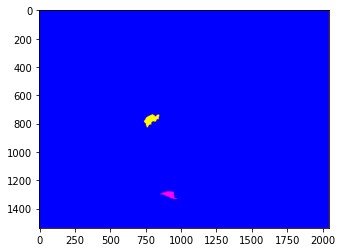

In [ ]:
#Let us color boundaries in yellow. 
#Remember that watershed assigns boundaries a value of -1
img[markers == -1] = [0,255,255]  

#label2rgb - Return an RGB image where color-coded labels are painted over the image.
img2 = color.label2rgb(markers, bg_label=0)

plt.imshow(img2)
cv2.imshow('Overlay on original image', img)
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)

In [ ]:
#Now, time to extract properties of detected cells
#Directly capturing props to pandas dataframe
    
props = measure.regionprops_table(markers, cells, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity', 'orientation',
                                      'perimeter'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

#To delete small regions...
df = df[df['area'] > 50]
print(df.head())

   label     area  equivalent_diameter  mean_intensity  solidity  orientation  \
0     10  3130032          1996.316738      147.868564  0.997282     1.570411   
1     11     4963            79.492691      171.906508  0.788278    -1.024915   
2     12     2906            60.827906      164.782175  0.730518     1.276400   

     perimeter  
0  7960.347330  
1   426.736111  
2   355.190909  
   label     area  equivalent_diameter  mean_intensity  solidity  orientation  \
0     10  3130032          1996.316738      147.868564  0.997282     1.570411   
1     11     4963            79.492691      171.906508  0.788278    -1.024915   
2     12     2906            60.827906      164.782175  0.730518     1.276400   

     perimeter  
0  7960.347330  
1   426.736111  
2   355.190909  


In [ ]:
#Convert to micron scale
df['area_sq_microns'] = df['area'] * (pixels_to_um**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (pixels_to_um)
print(df.head())

#df.to_csv('data/cast_iron_measurements.csv')

   label     area  equivalent_diameter  mean_intensity  solidity  orientation  \
0     10  3130032          1996.316738      147.868564  0.997282     1.570411   
1     11     4963            79.492691      171.906508  0.788278    -1.024915   
2     12     2906            60.827906      164.782175  0.730518     1.276400   

     perimeter  area_sq_microns  equivalent_diameter_microns  
0  7960.347330    645149.675712                   906.327799  
1   426.736111      1022.953708                    36.089682  
2   355.190909       598.973096                    27.615869  
